In [1]:
from TDA import Mapper
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

Text(0.5, 1.0, 'Original Data')

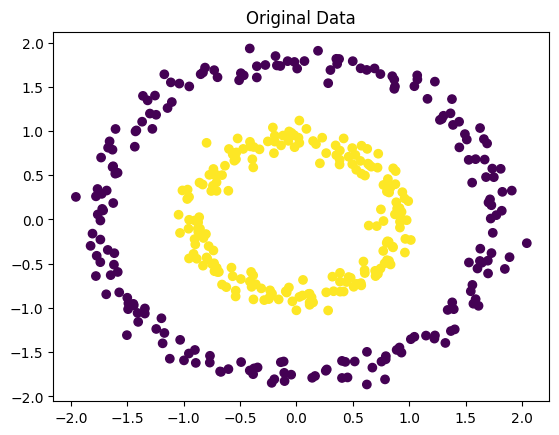

In [2]:
X, y = make_circles(n_samples=400, factor=0.5, noise=0.05, random_state=42)
X = StandardScaler().fit_transform(X)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Original Data")

In [3]:
def radial_lens(x):
    return np.linalg.norm(X, axis=1)

In [4]:
def simple_lens(x):
    return x[:,0]

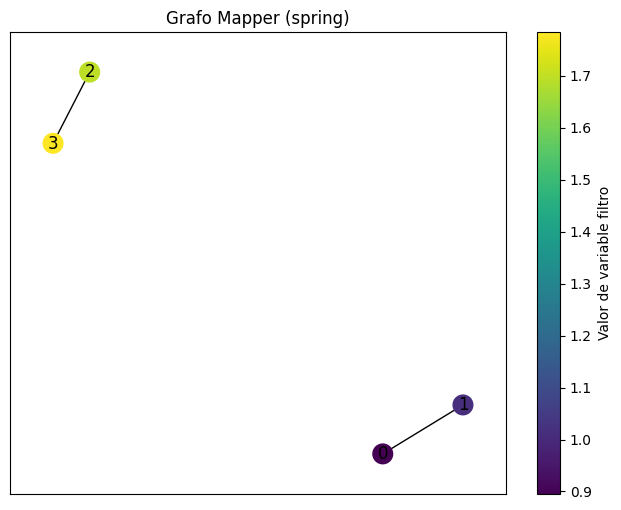

In [5]:
mapper_r = Mapper(
    lens_func=radial_lens,      
    n_intervals=4,               
    overlap=0.3,                  
    clusterer=DBSCAN(eps=3, min_samples=3),
    nerve_order= 3
)

mapper_r.fit(X)
mapper_r.plot_graph(color_data=mapper_r.lens_values)


In [6]:
mapper_r.nerve

[(0, 1), (2, 3)]

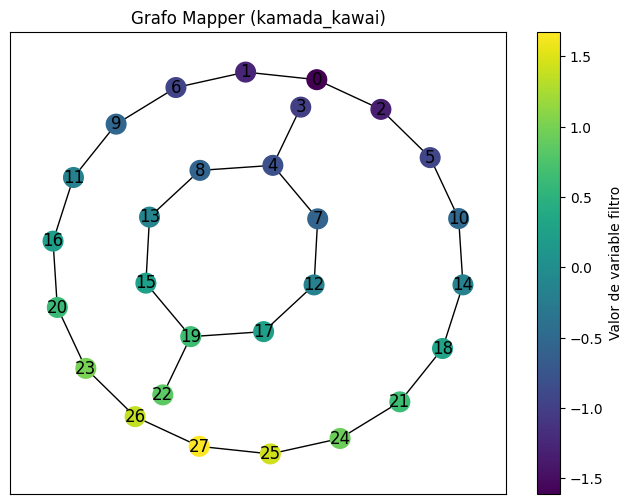

In [7]:
mapper_r = Mapper(
    lens_func=simple_lens,      
    n_intervals=10,               
    overlap=0.4,                  
    clusterer=DBSCAN(eps=0.3, min_samples=3),
    nerve_order= 4
)

mapper_r.fit(X)
mapper_r.plot_graph(color_data=mapper_r.lens_values, layout='kamada_kawai')


In [8]:
mapper_r.base